# Stats and Public Health Part 1

West Nile Virus (WNV) is a viral illness largely spread by mosquitoes. The disease is transmitted to a person when an infected mosquito bites them.

The city of Chicago, Illinois has been keeping track of mosquito populations and WNV prevalence using a series of traps that they place around the city. They are then able to study the captured specimens and monitor the state of WNV spread in the city.

You are given mosquito tracking data from 2008 to 2019.

In this deliverable, you will perform basic EDA and data wrangling to get familiar with the dataset from the city of Chicago.

### Dataset
mosquito tracking data from 2008 to 2019.

- Year:	Year that the WNV test is performed		
- Week:	Week that the WNV test is performed			
- Address Block:	Address of the location of trap	
- Block:	Block number of address			
- Trap:	Id of the trap	string	Some traps are "satellite traps". These are traps that are set up near (usually within 6 blocks) an established trap to enhance surveillance efforts. Satellite traps are post fixed with letters. For example, T220A is a satellite trap to T220.	
- Trap type:	Type of trap		
- Date:	Date and time that the WNV test is performed	string	Please note that not all the locations are tested at all times. Also, records exist only when a particular species of mosquitoes is found at a certain trap at a certain time.	
- Mosquito number:	Number of mosquitoes caught in this trap	int64	These test results are organized in such a way that when the number of mosquitoes exceed 50, they are split into another record (another row in the dataset), such that the number of mosquitoes are capped at 50.	
- Mosquito ID:	Id for Mosquito species			
- WNV Present:	Whether West Nile Virus was present in these mosquitos		
- Species:	Mosquito species		
- Lat:	Latitude of trap		
- Lon:	Longitude of trap	


# Data Cleaning

First, let's read in the data and take a look at what we're working with, and assess the level of cleaning and preprocessing that needs to be done.

In [504]:
#First import the needed libraries and read the csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
df = pd.read_csv('mosquito_data.csv')


#Let's look at the data
df.head()

In [553]:
df.head()

Year Week      Address Block Block  Trap Trap type                Date  \
0  2019   39    W OHARE AIRPORT   100  T910    GRAVID 2019-09-26 00:09:00   
1  2019   39       S KOLMAR AVE    52  T114    GRAVID 2019-09-26 00:09:00   
2  2019   39      N WESTERN AVE    58  T028    GRAVID 2019-09-26 00:09:00   
3  2019   39  N SPRINGFIELD AVE    39  T228    GRAVID 2019-09-26 00:09:00   
4  2019   39      S BRANDON AVE   131  T209    GRAVID 2019-09-26 00:09:00   

  Mosquito number Mosquito ID WNV Present         Species        Lat  \
0               2         Res    negative  CULEX RESTUANS  41.996536   
1               1         Res    negative  CULEX RESTUANS  41.798211   
2               2         Res    negative  CULEX RESTUANS  41.987245   
3               1         Res    negative  CULEX RESTUANS  41.953664   
4               9         Res    negative  CULEX RESTUANS  41.657069   

         Lon  Week Day Day of Month Month      Time        date  
0 -87.892960  Thursday           26     9  00:09:00  2019-09-26  
1 -87.736925  Thursday           26     9  00:09:00  2019-09-26  
2 -87.689417  Thursday           26     9  00:09:00  2019-09-26  
3 -87.724987  Thursday           26     9  00:09:00  2019-09-26  
4 -87.546049  Thursday           26     9  00:09:00  2019-09-26

In [505]:
df.dtypes


Year                 int64
Week                 int64
Address Block       object
Block                int64
Trap                object
Trap type           object
Date                object
Mosquito number      int64
Mosquito ID         object
WNV Present         object
Species             object
Lat                float64
Lon                float64
dtype: object

# Part 1 - Basic Data Wrangling

What is the shape of the dataframe?

In [506]:
# How much data are we working with here?
df.shape

(18495, 13)

In [507]:
print(f'Our dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

Our dataframe has 18495 rows and 13 columns.


We have 18495 rows of 13 different variables that were provided. However, possibly some concern as there does not appear to be a unique customer identifier, nor is it clear that the index column that was read in is a unique identifier on the row-level. We will proceed with caution, and check for duplicates in the data and so on.

Next steps:

Check datatypes and formats
Check for duplicate data (is the data unique on the row-level? What is the row-level?)
Check for missing data

#### Step 1: Check datatypes and formats

First we will investigate the structure and format of the data to make sure that nothing is amiss.

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB



We see there are a mixture of numeric and non-numeric columns. Many "object" type which corresponds to string / categorical data. We can also see that there may be some binary type columns which could be True/False or 0/1 which are captured as "yes"/"no". Finally, we see that there are some columns missing data (<11,720 non-null values) e.g. last_contact_duration appears to be missing a large proportion of data.

In [509]:
df.describe()

Year          Week         Block  Mosquito number  \
count  18495.000000  18495.000000  18495.000000     18495.000000   
mean    2012.905812     31.004001     54.314788        10.879913   
std        3.725857      4.332020     36.712796        13.475066   
min     2007.000000     20.000000      1.000000         1.000000   
25%     2010.000000     28.000000     22.000000         2.000000   
50%     2013.000000     31.000000     51.000000         5.000000   
75%     2016.000000     34.000000     89.000000        14.000000   
max     2019.000000     40.000000    132.000000        50.000000   

                Lat           Lon  
count  15571.000000  15571.000000  
mean      41.839963    -87.691642  
std        0.111374      0.076545  
min       41.644720    -87.854473  
25%       41.742670    -87.747459  
50%       41.845715    -87.691698  
75%       41.945961    -87.637873  
max       42.017801    -87.531051

#### 2.Convert the 'Date' column to have a datetime format.

In [510]:
df['Date']

0        2019-09-26 00:09:00
1        2019-09-26 00:09:00
2        2019-09-26 00:09:00
3        2019-09-26 00:09:00
4        2019-09-26 00:09:00
                ...         
18490    2016-09-09 00:09:00
18491    2007-08-24 00:08:00
18492    2016-07-27 00:07:00
18493    2017-08-17 00:08:00
18494    2015-08-20 00:08:00
Name: Date, Length: 18495, dtype: object

In [511]:
df["Date"] = pd.to_datetime(df["Date"])

In [570]:
df['Date']

0       2019-09-26 00:09:00
1       2019-09-26 00:09:00
2       2019-09-26 00:09:00
3       2019-09-26 00:09:00
4       2019-09-26 00:09:00
                ...        
18489   2013-08-29 00:08:00
18490   2016-09-09 00:09:00
18491   2007-08-24 00:08:00
18492   2016-07-27 00:07:00
18493   2017-08-17 00:08:00
Name: Date, Length: 17837, dtype: datetime64[ns]

In [512]:
# I extracted the weekday,Day of month, month,time and date from Date and add new column to df for future analyzation
df['Week Day']=df['Date'].dt.day_name()
df['Day of Month']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Time']=df['Date'].dt.time
df['date']=df['Date'].dt.date
df.head()

Year  Week           Address Block  Block  Trap Trap type  \
0  2019    39   100XX W OHARE AIRPORT    100  T910    GRAVID   
1  2019    39       52XX S KOLMAR AVE     52  T114    GRAVID   
2  2019    39      58XX N WESTERN AVE     58  T028    GRAVID   
3  2019    39  39XX N SPRINGFIELD AVE     39  T228    GRAVID   
4  2019    39     131XX S BRANDON AVE    131  T209    GRAVID   

                 Date  Mosquito number Mosquito ID WNV Present  \
0 2019-09-26 00:09:00                2         Res    negative   
1 2019-09-26 00:09:00                1         Res    negative   
2 2019-09-26 00:09:00                2         Res    negative   
3 2019-09-26 00:09:00                1         Res    negative   
4 2019-09-26 00:09:00                9         Res    negative   

          Species        Lat        Lon  Week Day  Day of Month  Month  \
0  CULEX RESTUANS        NaN        NaN  Thursday            26      9   
1  CULEX RESTUANS  41.798211 -87.736925  Thursday            26      9   
2  CULEX RESTUANS  41.987245 -87.689417  Thursday            26      9   
3  CULEX RESTUANS  41.953664 -87.724987  Thursday            26      9   
4  CULEX RESTUANS  41.657069 -87.546049  Thursday            26      9   

       Time        date  
0  00:09:00  2019-09-26  
1  00:09:00  2019-09-26  
2  00:09:00  2019-09-26  
3  00:09:00  2019-09-26  
4  00:09:00  2019-09-26

Pick two numeric and two categorical columns: What data they are storing? How are they distributed? 

In [513]:
#checking the first numeric column and the distribution
df['Mosquito number'].describe

<bound method NDFrame.describe of 0         2
1         1
2         2
3         1
4         9
         ..
18490     4
18491    19
18492    34
18493    50
18494     6
Name: Mosquito number, Length: 18495, dtype: int64>

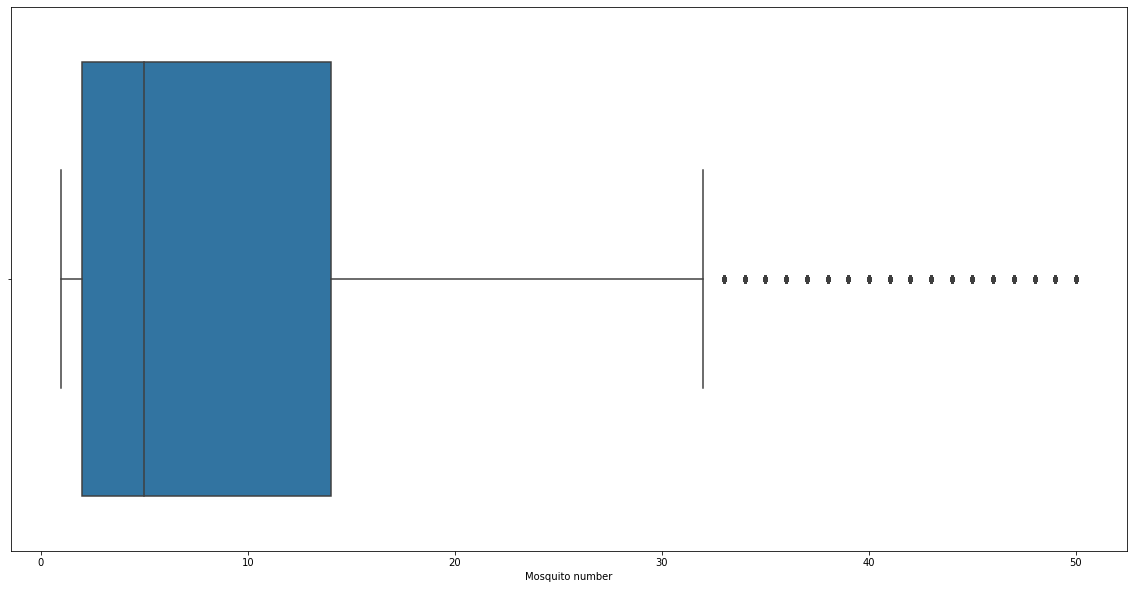

In [514]:
import seaborn as sns
sns.boxplot(data=df, x='Mosquito number')
plt.show()

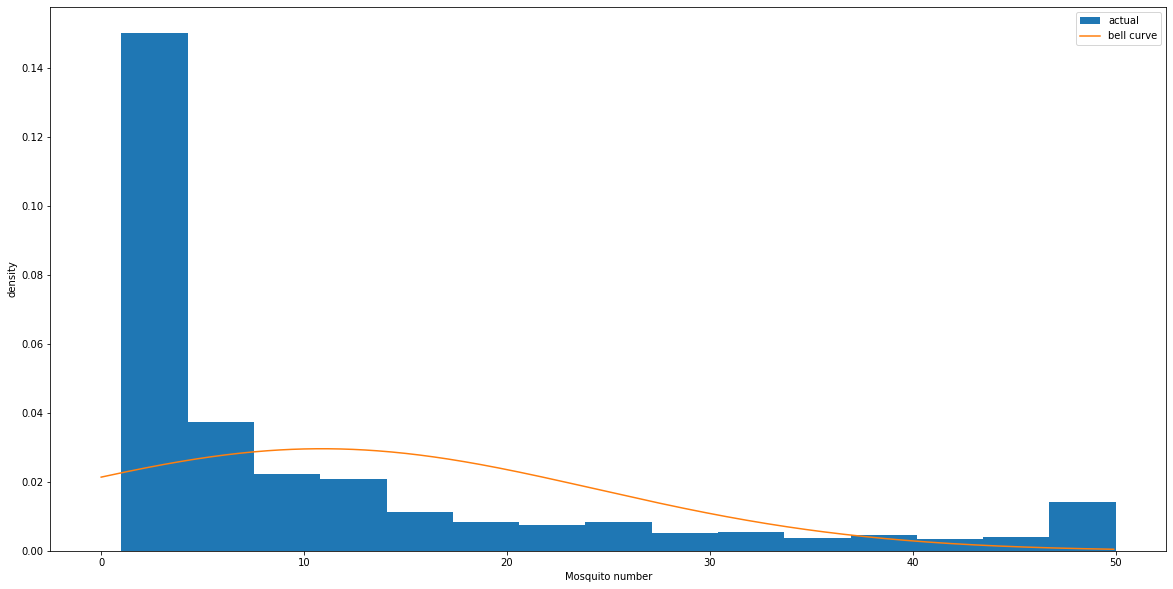

In [515]:
from scipy.stats import norm

plt.figure()

#plot actual data distribution
plt.hist(df['Mosquito number'], bins=15, density=True, label='actual')

#plot mean and standard deviation
mean = df['Mosquito number'].mean()
std = df['Mosquito number'].std()

#set-up intervals
xvals = np.arange(0, 50, 0.1) #lowest value for x-axis = 0, highest = 50, step size = 0.01

#plot overlay of bell curve to check the distribution
plt.plot(xvals, norm.pdf(xvals, loc=mean, scale=std), label='bell curve')

#label graph
plt.xlabel('Mosquito number')
plt.ylabel('density')
plt.legend()

#print graph
plt.show()

Most of the trapped Mosquito numbers are below 10

In [516]:
#Checking the second numerical
df['Block'].describe

<bound method NDFrame.describe of 0        100
1         52
2         58
3         39
4        131
        ... 
18490      3
18491     46
18492    127
18493     20
18494    100
Name: Block, Length: 18495, dtype: int64>

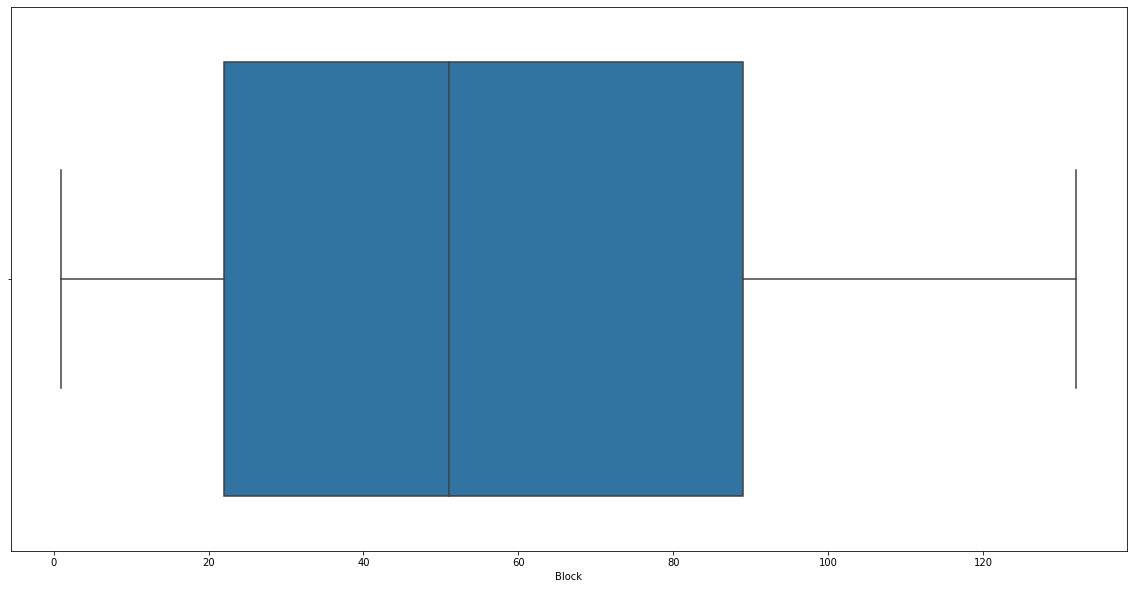

In [517]:
import seaborn as sns

sns.boxplot(data=df, x='Block')
plt.show()

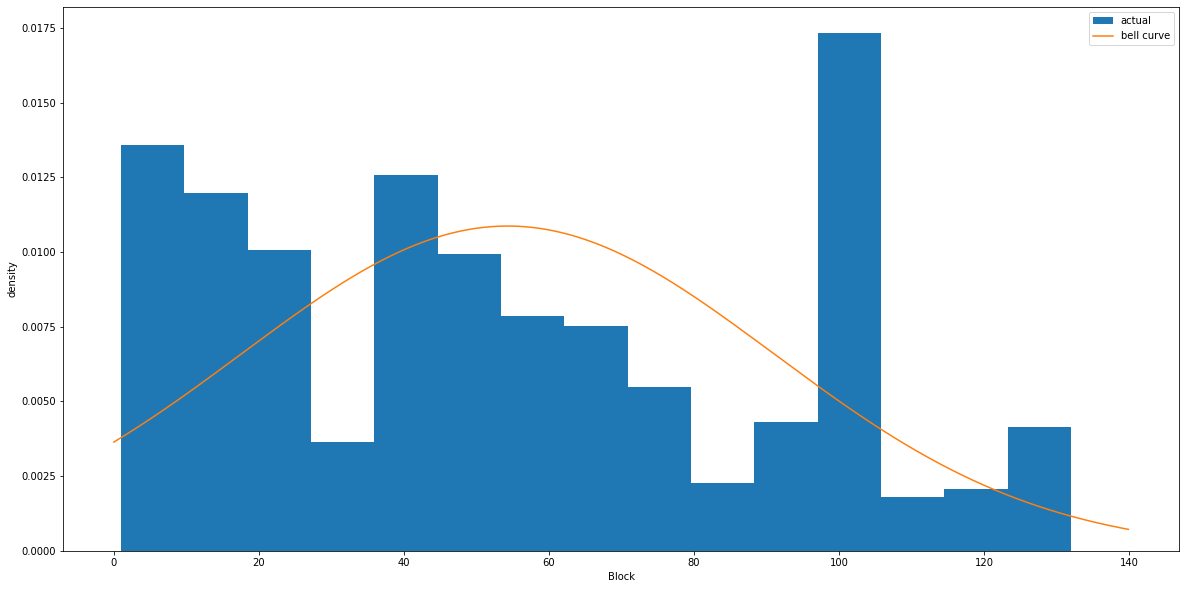

In [518]:
plt.figure()

#plot actual data distribution
plt.hist(df['Block'], bins=15, density=True, label='actual')

#plot mean and standard deviation
mean = df['Block'].mean()
std = df['Block'].std()

#set-up intervals
xvals = np.arange(0, 140, 0.1) #lowest value for x-axis = 0, highest = 140, step size = 0.01

#plot overlay of bell curve to check the distribution
plt.plot(xvals, norm.pdf(xvals, loc=mean, scale=std), label='bell curve')

#label graph
plt.xlabel('Block')
plt.ylabel('density')
plt.legend()

#print graph
plt.show()

From the distribution we can see most of the traps are not sattelite ones because as the data described the satellite traps are 
close to each other(below 6 blocks)

In [519]:
#Checking the first categorial column
df['Trap type'].describe

<bound method NDFrame.describe of 0          GRAVID
1          GRAVID
2          GRAVID
3          GRAVID
4          GRAVID
           ...   
18490      GRAVID
18491      GRAVID
18492      GRAVID
18493    SENTINEL
18494      GRAVID
Name: Trap type, Length: 18495, dtype: object>

<AxesSubplot: xlabel='Trap type'>

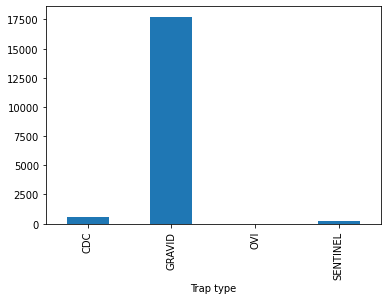

In [520]:
#For plotting the distribution first we need to group by
plt.figure(figsize=(6, 4))
df2=df.groupby(by='Trap type').size()
df2.plot.bar()

In [521]:
#Checking the second categorial column
df['WNV Present'].describe

<bound method NDFrame.describe of 0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
18490    positive
18491    positive
18492    positive
18493    positive
18494    positive
Name: WNV Present, Length: 18495, dtype: object>

<AxesSubplot: xlabel='WNV Present'>

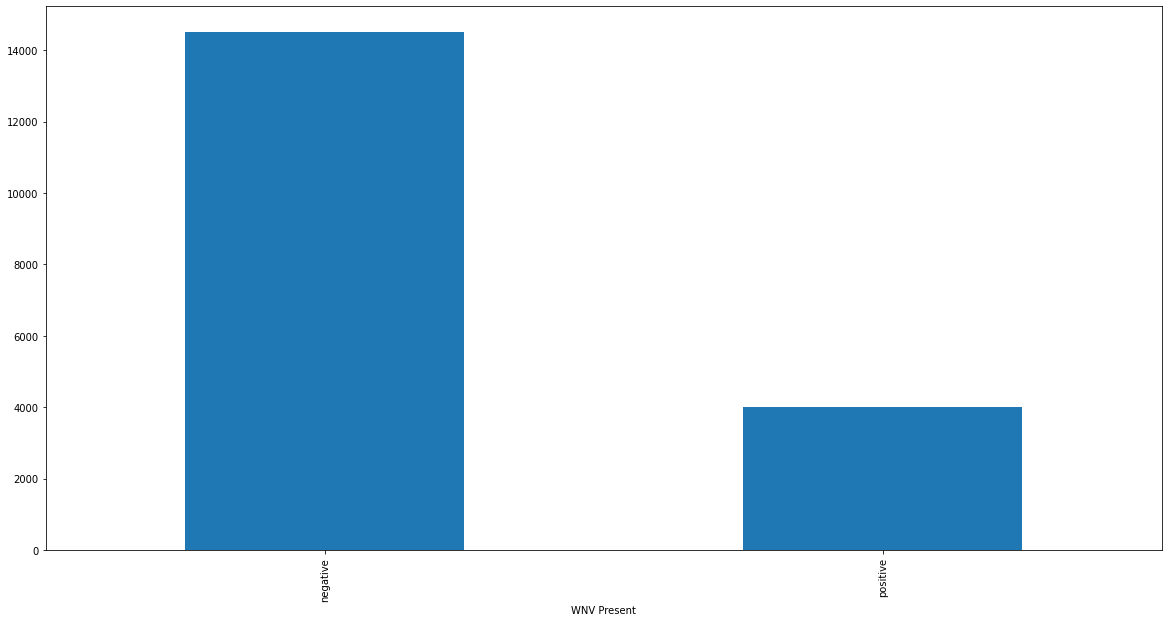

In [522]:
df2=df.groupby(by='WNV Present').size()
df2.plot.bar()

Are there any columns that contain duplicate information? If so, remove the redundant columns.

In [523]:
df = df.T.drop_duplicates().T

C:\Users\molla\AppData\Local\Temp\ipykernel_15580\1344427241.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df = df.T.drop_duplicates().T


Now that we have a column for date and time separately we can drop the Date column

In [524]:
df.drop(columns=['Date'])

Year Week           Address Block Block   Trap Trap type  \
0      2019   39   100XX W OHARE AIRPORT   100   T910    GRAVID   
1      2019   39       52XX S KOLMAR AVE    52   T114    GRAVID   
2      2019   39      58XX N WESTERN AVE    58   T028    GRAVID   
3      2019   39  39XX N SPRINGFIELD AVE    39   T228    GRAVID   
4      2019   39     131XX S BRANDON AVE   131   T209    GRAVID   
...     ...  ...                     ...   ...    ...       ...   
18490  2016   36           3XX W 18TH ST     3   T043    GRAVID   
18491  2007   34    46XX N MILWAUKEE AVE    46   T003    GRAVID   
18492  2016   30        127XX S DOTY AVE   127   T115    GRAVID   
18493  2017   33      20XX N DOMINICK ST    20  T240B  SENTINEL   
18494  2015   33   100XX W OHARE AIRPORT   100   T902    GRAVID   

      Mosquito number Mosquito ID WNV Present         Species        Lat  \
0                   2         Res    negative  CULEX RESTUANS        NaN   
1                   1         Res    negative  CULEX RESTUANS  41.798211   
2                   2         Res    negative  CULEX RESTUANS  41.987245   
3                   1         Res    negative  CULEX RESTUANS  41.953664   
4                   9         Res    negative  CULEX RESTUANS  41.657069   
...               ...         ...         ...             ...        ...   
18490               4         Pip    positive   CULEX PIPIENS  41.857843   
18491              19         Pip    positive   CULEX PIPIENS  41.965376   
18492              34         Res    positive  CULEX RESTUANS  41.662395   
18493              50         Res    positive  CULEX RESTUANS  41.919197   
18494               6         Res    positive  CULEX RESTUANS        NaN   

             Lon   Week Day Day of Month Month      Time        date  
0            NaN   Thursday           26     9  00:09:00  2019-09-26  
1     -87.736925   Thursday           26     9  00:09:00  2019-09-26  
2     -87.689417   Thursday           26     9  00:09:00  2019-09-26  
3     -87.724987   Thursday           26     9  00:09:00  2019-09-26  
4     -87.546049   Thursday           26     9  00:09:00  2019-09-26  
...          ...        ...          ...   ...       ...         ...  
18490 -87.635858     Friday            9     9  00:09:00  2016-09-09  
18491 -87.758403     Friday           24     8  00:08:00  2007-08-24  
18492 -87.590176  Wednesday           27     7  00:07:00  2016-07-27  
18493 -87.664758   Thursday           17     8  00:08:00  2017-08-17  
18494        NaN   Thursday           20     8  00:08:00  2015-08-20  

[18495 rows x 17 columns]

In [525]:
# Checking for duplicates and counting
df.duplicated().sum()

658

There are apparently 658 duplicate rows in the dataset. What does this represent as a percentage?

In [526]:
df.duplicated().sum()/df.shape[0]*100.0

3.5577183022438494

Approximately 3.5% of the dataset is duplicate on the row-level. Let us investigate further using the index returned.

In [527]:
# drop the duplicates and save the result to a new variable
df = df.drop_duplicates()
df.head()

Year Week           Address Block Block  Trap Trap type  \
0  2019   39   100XX W OHARE AIRPORT   100  T910    GRAVID   
1  2019   39       52XX S KOLMAR AVE    52  T114    GRAVID   
2  2019   39      58XX N WESTERN AVE    58  T028    GRAVID   
3  2019   39  39XX N SPRINGFIELD AVE    39  T228    GRAVID   
4  2019   39     131XX S BRANDON AVE   131  T209    GRAVID   

                 Date Mosquito number Mosquito ID WNV Present         Species  \
0 2019-09-26 00:09:00               2         Res    negative  CULEX RESTUANS   
1 2019-09-26 00:09:00               1         Res    negative  CULEX RESTUANS   
2 2019-09-26 00:09:00               2         Res    negative  CULEX RESTUANS   
3 2019-09-26 00:09:00               1         Res    negative  CULEX RESTUANS   
4 2019-09-26 00:09:00               9         Res    negative  CULEX RESTUANS   

         Lat        Lon  Week Day Day of Month Month      Time        date  
0        NaN        NaN  Thursday           26     9  00:09:00  2019-09-26  
1  41.798211 -87.736925  Thursday           26     9  00:09:00  2019-09-26  
2  41.987245 -87.689417  Thursday           26     9  00:09:00  2019-09-26  
3  41.953664 -87.724987  Thursday           26     9  00:09:00  2019-09-26  
4  41.657069 -87.546049  Thursday           26     9  00:09:00  2019-09-26

In [528]:
#Sanity check
df.duplicated().sum()

0

In [529]:
#Now we have removed all the duplicated rows from the original dataframe. 
#Let us also be thorough and check that no two columns also contain the same information. 
#To do this, we will take the original dataframe's transpose, 
#and check for duplicates on its rows level
df.T.duplicated()

C:\Users\molla\AppData\Local\Temp\ipykernel_15580\2691169844.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df.T.duplicated()


Year               False
Week               False
Address Block      False
Block              False
Trap               False
Trap type          False
Date               False
Mosquito number    False
Mosquito ID        False
WNV Present        False
Species            False
Lat                False
Lon                False
Week Day           False
Day of Month       False
Month              False
Time               False
date               False
dtype: bool

Looking at the above, since all the result are False so we are confident that none of the columns in the provided data are duplicate / contain the exact same information even though they have different column names.

# Dealing with missing data

Are there any null values in the dataframe? If so, deal with them appropriately

In [530]:
df.isna().sum()

Year                  0
Week                  0
Address Block         0
Block                 0
Trap                  0
Trap type             0
Date                  0
Mosquito number       0
Mosquito ID           0
WNV Present           0
Species               0
Lat                2266
Lon                2266
Week Day              0
Day of Month          0
Month                 0
Time                  0
date                  0
dtype: int64

In [531]:
# Percentage of missing values in each column
df.isna().sum()/df.shape[0]*100.0

Year                0.00000
Week                0.00000
Address Block       0.00000
Block               0.00000
Trap                0.00000
Trap type           0.00000
Date                0.00000
Mosquito number     0.00000
Mosquito ID         0.00000
WNV Present         0.00000
Species             0.00000
Lat                12.70393
Lon                12.70393
Week Day            0.00000
Day of Month        0.00000
Month               0.00000
Time                0.00000
date                0.00000
dtype: float64

Based on the above, it appears ~12.7% of values are missing for the Lon,Lat columns. 

In [532]:
df['Lon'].isnull()

0         True
1        False
2        False
3        False
4        False
         ...  
18489    False
18490    False
18491    False
18492    False
18493    False
Name: Lon, Length: 17837, dtype: bool

In [533]:
#First clean the address block column and extract the address
#the address contains number with x which is not helpful to find the Lon
#and Lat with the geocode we can get the address using regex

df['Address Block']=df['Address Block'].str.split(' ',n=1,expand=True)[1]

df.head()


Year Week      Address Block Block  Trap Trap type                Date  \
0  2019   39    W OHARE AIRPORT   100  T910    GRAVID 2019-09-26 00:09:00   
1  2019   39       S KOLMAR AVE    52  T114    GRAVID 2019-09-26 00:09:00   
2  2019   39      N WESTERN AVE    58  T028    GRAVID 2019-09-26 00:09:00   
3  2019   39  N SPRINGFIELD AVE    39  T228    GRAVID 2019-09-26 00:09:00   
4  2019   39      S BRANDON AVE   131  T209    GRAVID 2019-09-26 00:09:00   

  Mosquito number Mosquito ID WNV Present         Species        Lat  \
0               2         Res    negative  CULEX RESTUANS        NaN   
1               1         Res    negative  CULEX RESTUANS  41.798211   
2               2         Res    negative  CULEX RESTUANS  41.987245   
3               1         Res    negative  CULEX RESTUANS  41.953664   
4               9         Res    negative  CULEX RESTUANS  41.657069   

         Lon  Week Day Day of Month Month      Time        date  
0        NaN  Thursday           26     9  00:09:00  2019-09-26  
1 -87.736925  Thursday           26     9  00:09:00  2019-09-26  
2 -87.689417  Thursday           26     9  00:09:00  2019-09-26  
3 -87.724987  Thursday           26     9  00:09:00  2019-09-26  
4 -87.546049  Thursday           26     9  00:09:00  2019-09-26

In [534]:
#Sanity check
df['Address Block'].head()

0      W OHARE AIRPORT
1         S KOLMAR AVE
2        N WESTERN AVE
3    N SPRINGFIELD AVE
4        S BRANDON AVE
Name: Address Block, dtype: object

We can find the missing Lon and Lat from the address using geocode

In [535]:
#first find the Lon by going over rows
geolocator = Nominatim(user_agent="YOUR NAME's mapping app", timeout=2)
for index, row in df.iterrows():
        if(pd.isnull(df['Lon'][index])):
            location = geolocator.geocode(df['Address Block'][index])
            df['Lon'] = df['Lon'].fillna(location.longitude)


In [536]:
#Sanity Check
df.head()


Year Week      Address Block Block  Trap Trap type                Date  \
0  2019   39    W OHARE AIRPORT   100  T910    GRAVID 2019-09-26 00:09:00   
1  2019   39       S KOLMAR AVE    52  T114    GRAVID 2019-09-26 00:09:00   
2  2019   39      N WESTERN AVE    58  T028    GRAVID 2019-09-26 00:09:00   
3  2019   39  N SPRINGFIELD AVE    39  T228    GRAVID 2019-09-26 00:09:00   
4  2019   39      S BRANDON AVE   131  T209    GRAVID 2019-09-26 00:09:00   

  Mosquito number Mosquito ID WNV Present         Species        Lat  \
0               2         Res    negative  CULEX RESTUANS        NaN   
1               1         Res    negative  CULEX RESTUANS  41.798211   
2               2         Res    negative  CULEX RESTUANS  41.987245   
3               1         Res    negative  CULEX RESTUANS  41.953664   
4               9         Res    negative  CULEX RESTUANS  41.657069   

         Lon  Week Day Day of Month Month      Time        date  
0 -87.892960  Thursday           26     9  00:09:00  2019-09-26  
1 -87.736925  Thursday           26     9  00:09:00  2019-09-26  
2 -87.689417  Thursday           26     9  00:09:00  2019-09-26  
3 -87.724987  Thursday           26     9  00:09:00  2019-09-26  
4 -87.546049  Thursday           26     9  00:09:00  2019-09-26

In [537]:
#Same for Lat by extracting location.latitude
geolocator = Nominatim(user_agent="YOUR NAME's mapping app", timeout=2)
for index, row in df.iterrows():
        if(pd.isnull(df['Lat'][index])):
            location = geolocator.geocode(df['Address Block'][index])
            df['Lat'] = df['Lat'].fillna(location.latitude)

In [538]:
#sanity check
df.head()

Year Week      Address Block Block  Trap Trap type                Date  \
0  2019   39    W OHARE AIRPORT   100  T910    GRAVID 2019-09-26 00:09:00   
1  2019   39       S KOLMAR AVE    52  T114    GRAVID 2019-09-26 00:09:00   
2  2019   39      N WESTERN AVE    58  T028    GRAVID 2019-09-26 00:09:00   
3  2019   39  N SPRINGFIELD AVE    39  T228    GRAVID 2019-09-26 00:09:00   
4  2019   39      S BRANDON AVE   131  T209    GRAVID 2019-09-26 00:09:00   

  Mosquito number Mosquito ID WNV Present         Species        Lat  \
0               2         Res    negative  CULEX RESTUANS  41.996536   
1               1         Res    negative  CULEX RESTUANS  41.798211   
2               2         Res    negative  CULEX RESTUANS  41.987245   
3               1         Res    negative  CULEX RESTUANS  41.953664   
4               9         Res    negative  CULEX RESTUANS  41.657069   

         Lon  Week Day Day of Month Month      Time        date  
0 -87.892960  Thursday           26     9  00:09:00  2019-09-26  
1 -87.736925  Thursday           26     9  00:09:00  2019-09-26  
2 -87.689417  Thursday           26     9  00:09:00  2019-09-26  
3 -87.724987  Thursday           26     9  00:09:00  2019-09-26  
4 -87.546049  Thursday           26     9  00:09:00  2019-09-26

In [539]:
#check if they have nulls
df['Lon'].isnull().sum()

0

In [565]:
df['Lat'].isnull().sum()

0

In [564]:
df['Lat'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
18489    False
18490    False
18491    False
18492    False
18493    False
Name: Lat, Length: 17837, dtype: bool

We have cleaned the data. Check the dataframe:

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17837 entries, 0 to 18493
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             17837 non-null  object        
 1   Week             17837 non-null  object        
 2   Address Block    17837 non-null  object        
 3   Block            17837 non-null  object        
 4   Trap             17837 non-null  object        
 5   Trap type        17837 non-null  object        
 6   Date             17837 non-null  datetime64[ns]
 7   Mosquito number  17837 non-null  object        
 8   Mosquito ID      17837 non-null  object        
 9   WNV Present      17837 non-null  object        
 10  Species          17837 non-null  object        
 11  Lat              17837 non-null  float64       
 12  Lon              17837 non-null  float64       
 13  Week Day         17837 non-null  object        
 14  Day of Month     17837 non-null  objec

Using an appropriate visual, or visuals, explore the relationship between mosquito number and date.

Text(0, 0.5, 'Numbers of Mosquito')

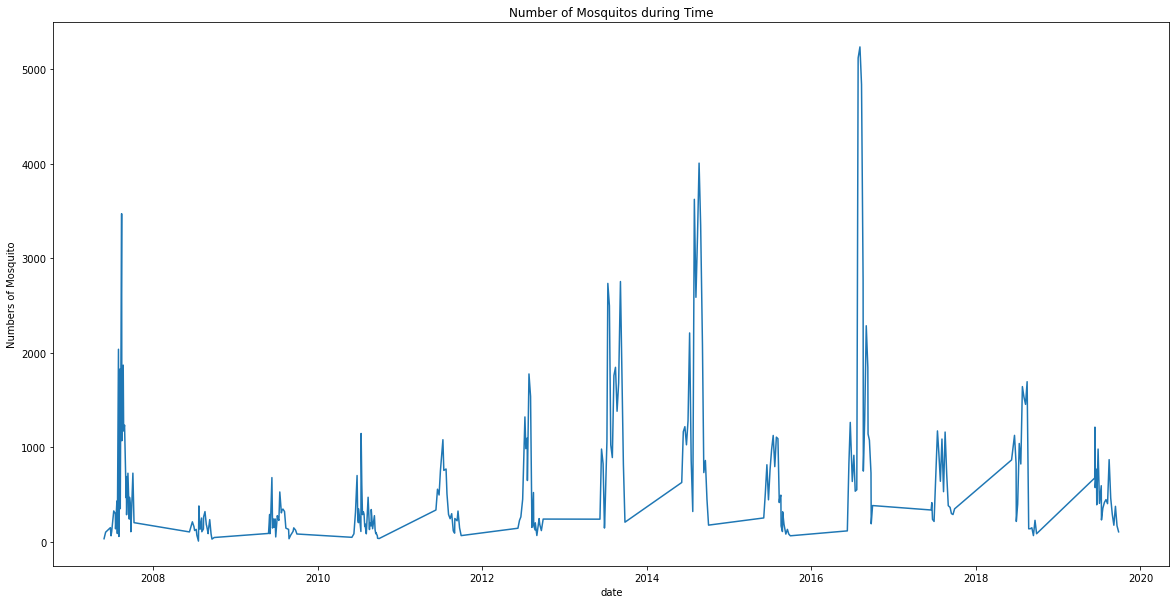

In [583]:
#For this visual we should group by date and sum the number of mosquitos for that date then plot

#adjusting the size
fig, ax = plt.subplots(figsize=(20,10))
#making a new df and plotting
df1=df.groupby(['date'])['Mosquito number'].sum().plot()
#give a title
plt.title('Number of Mosquitos during Time')
#label of x axis
plt.xlabel('date')
#label of y axis
plt.ylabel('Numbers of Mosquito')

With this figure we see the trend of number of mosquitos during time. but as the date is not continuous and on some times of the year
there was no trap this figure might be misinterpreting. That's why we group by year and month to see the mosquito numbers in
each year.

Text(0, 0.5, 'Numbers of Mosquito')

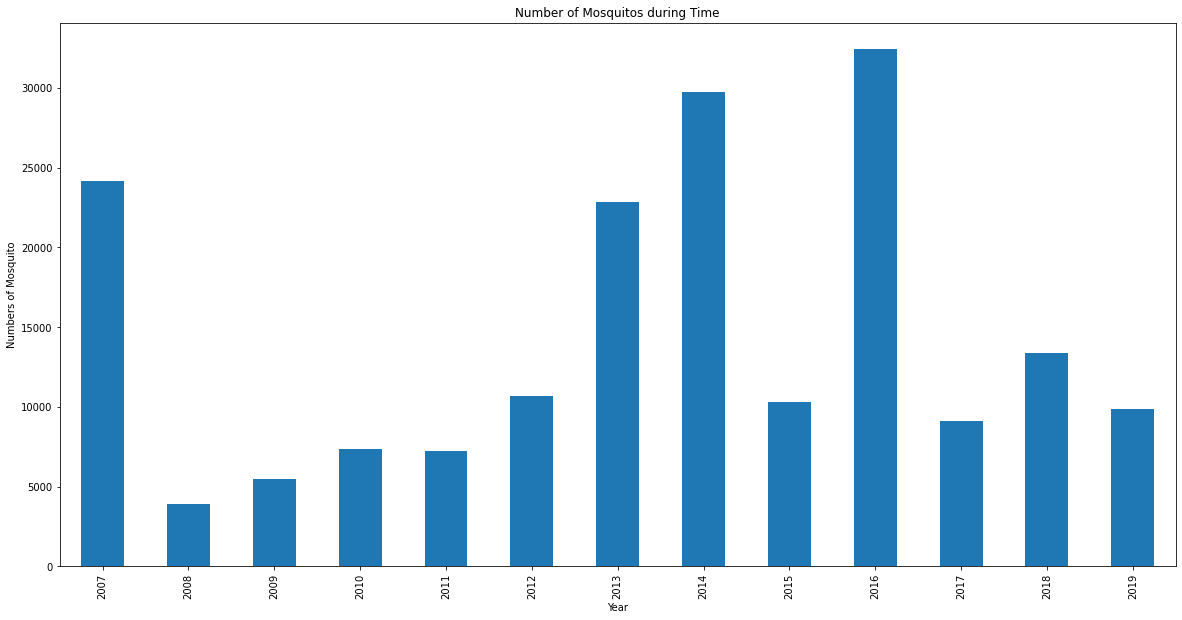

In [544]:

df_Year=df.groupby(['Year'])['Mosquito number'].sum().plot(kind='bar')
plt.title('Number of Mosquitos during Time')
plt.xlabel('Year')
plt.ylabel('Numbers of Mosquito')


We can also group our data by Year-Month to see the numbers in each month

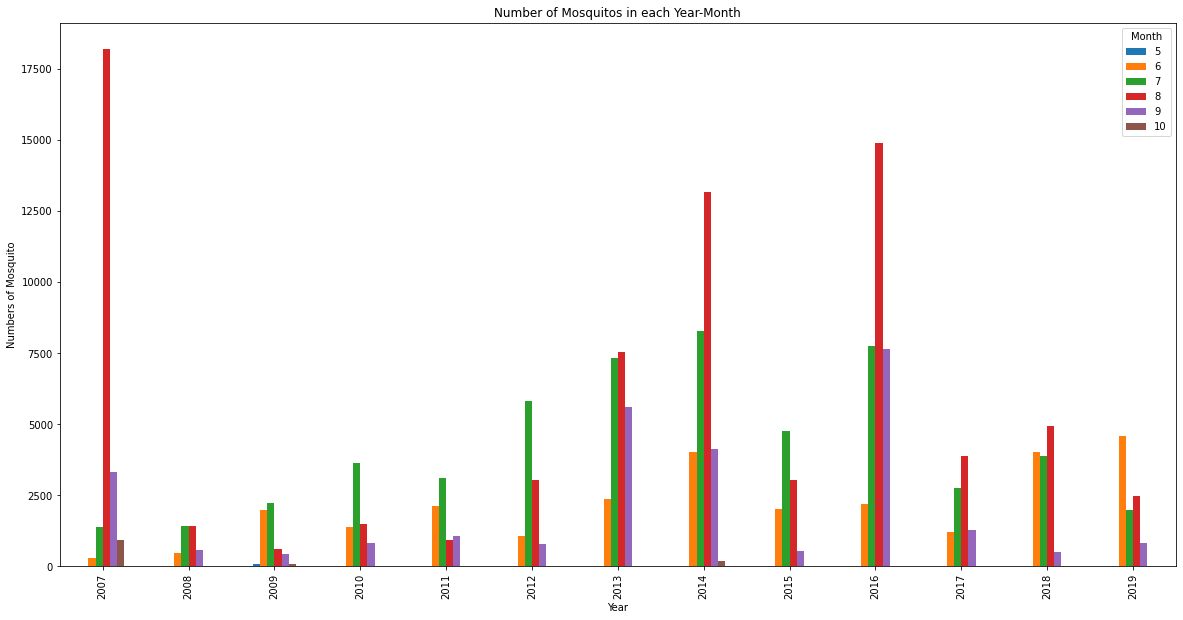

In [549]:
#adjusting the size
plt.rcParams["figure.figsize"] = [20, 10]

# group by Year-Month
df_YearMonth=df.groupby(['Year', 'Month'])['Mosquito number'].agg(['sum'])

#Using stack type
df_YearMonth.unstack().plot(kind='bar')

#title
plt.title('Number of Mosquitos in each Year-Month')

#xlabel
plt.xlabel('Year')

#ylabel
plt.ylabel('Numbers of Mosquito')

#editing legend
plt.legend(["5", "6",'7','8','9','10'], title='Month')

From the above figures we can see in the first year of the test the number of mosquitos drops down significantly, then it increased untill 2014. In 2016 it was at the highest number through all years, then increased in 2019. Also in July and August
there were the highest number of mosquitos caught which shows in the summer presence of mosquitos are more than other times.

Using an appropriate visual, explore the relationship between mosquito species and WNV prevalence

Text(0, 0.5, 'Number of Mosquitos')

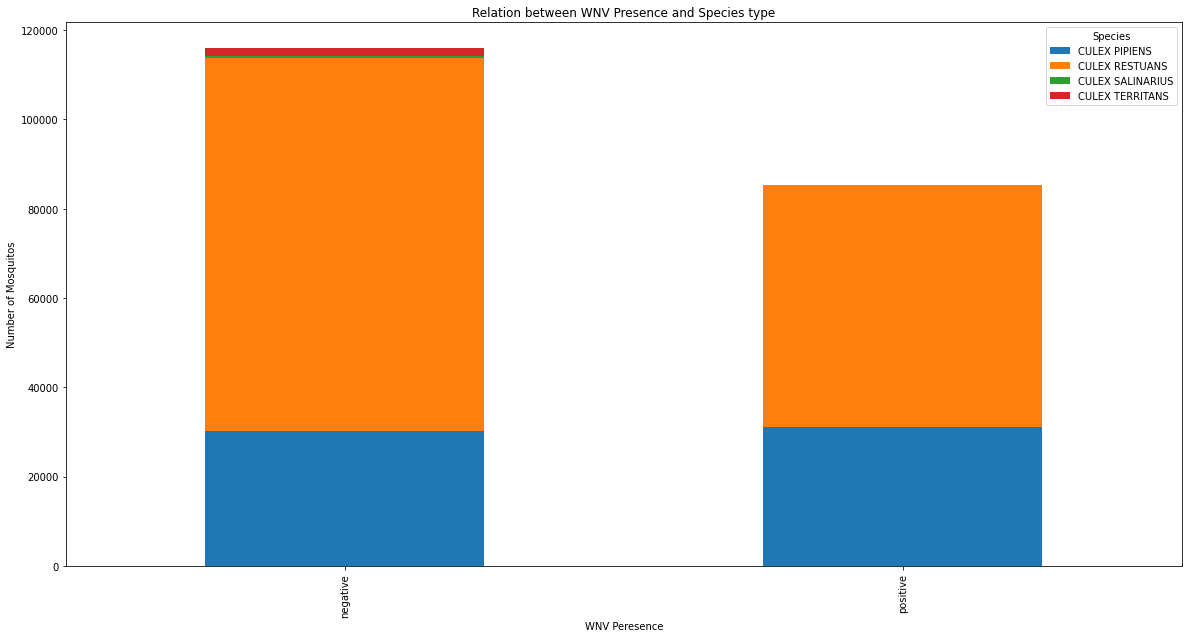

In [501]:
plt.rcParams["figure.figsize"] = [20, 10]
#first group by WNV Presence and Species
df_WNV_Species = df.groupby(['WNV Present','Species'])['Mosquito number'].sum()
df_WNV_Species.unstack().plot(kind='bar', stacked=True)

#title
plt.title('Relation between WNV Presence and Species type')

#xlabel
plt.xlabel('WNV Peresence')

#ylabel
plt.ylabel('Number of Mosquitos')


The figure shows the mosquitos which had WN virus were mainly CULEX RESTUANS and CCULEX PIPIENS type.

Using an appropriate visual, explore the relationship between the number of mosquitos caught and trap type.

Text(0, 0.5, 'Trap type')

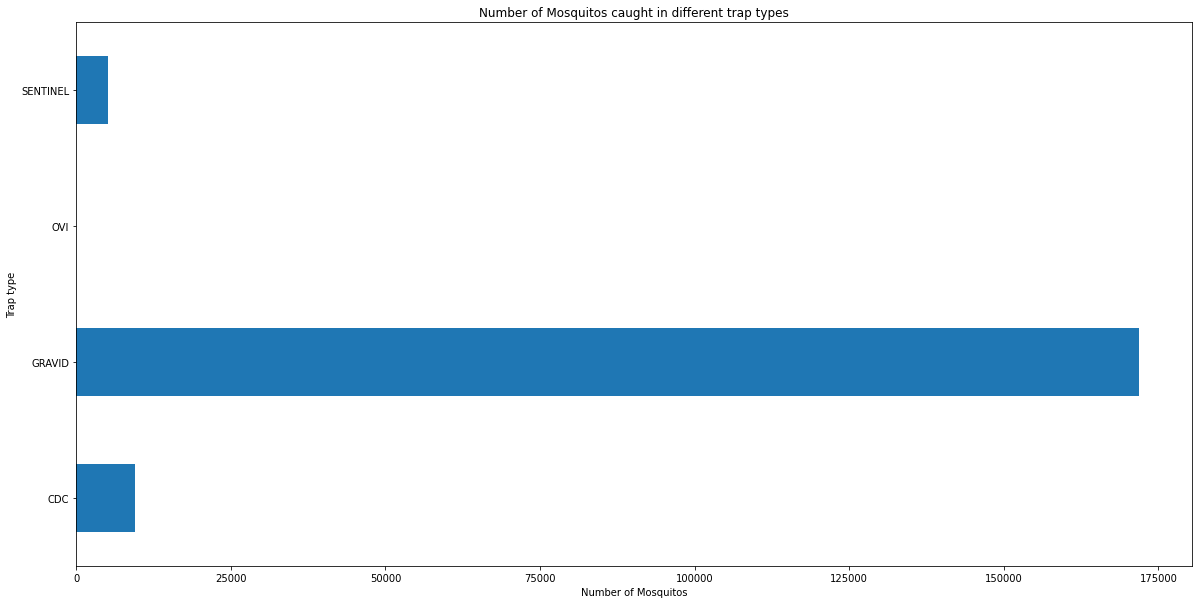

In [552]:
df_TrapMosquito=df.groupby(['Trap type'])['Mosquito number'].sum().plot(kind='barh')


#title
plt.title('Number of Mosquitos caught in different trap types')

#xlabel
plt.xlabel('Number of Mosquitos')

#ylabel
plt.ylabel('Trap type')

From this figure we can see that Gravid traps are the most effective ones to catch mosquitos.

Using an appropriate visual, come up with an additional insight of your choice.
Note: This visual should be a different type of visualization than the previous two

In [667]:
#making a new sataframe just for positive ones to look closer to the spread of virus
df_positive=df[df['WNV Present']== 'positive']
df_positive

Year Week    Address Block Block   Trap Trap type                Date  \
110    2019   37        W 65TH ST    42   T235    GRAVID 2019-09-12 00:09:00   
114    2019   37   W ARMITAGE AVE    70   T151    GRAVID 2019-09-12 00:09:00   
125    2019   37   N CAMPBELL AVE    45   T220    GRAVID 2019-09-12 00:09:00   
152    2019   36  W FULLERTON AVE    61   T013    GRAVID 2019-09-05 00:09:00   
178    2019   35       W 104TH ST     3   T095    GRAVID 2019-08-29 00:08:00   
...     ...  ...              ...   ...    ...       ...                 ...   
18489  2013   35        W 64TH ST    63   T155    GRAVID 2013-08-29 00:08:00   
18490  2016   36        W 18TH ST     3   T043    GRAVID 2016-09-09 00:09:00   
18491  2007   34  N MILWAUKEE AVE    46   T003    GRAVID 2007-08-24 00:08:00   
18492  2016   30       S DOTY AVE   127   T115    GRAVID 2016-07-27 00:07:00   
18493  2017   33    N DOMINICK ST    20  T240B  SENTINEL 2017-08-17 00:08:00   

      Mosquito number Mosquito ID WNV Present          Species        Lat  \
110                 8         Res    positive   CULEX RESTUANS  41.774841   
114                 8         Res    positive   CULEX RESTUANS  41.916135   
125                 8         Res    positive   CULEX RESTUANS  41.964405   
152                13         Res    positive   CULEX RESTUANS  41.923887   
178                 1         Ter    positive  CULEX TERRITANS  41.705328   
...               ...         ...         ...              ...        ...   
18489               3         Pip    positive    CULEX PIPIENS  41.776009   
18490               4         Pip    positive    CULEX PIPIENS  41.857843   
18491              19         Pip    positive    CULEX PIPIENS  41.965376   
18492              34         Res    positive   CULEX RESTUANS  41.662395   
18493              50         Res    positive   CULEX RESTUANS  41.919197   

             Lon   Week Day Day of Month Month      Time        date  
110   -87.728006   Thursday           12     9  00:09:00  2019-09-12  
114   -87.801093   Thursday           12     9  00:09:00  2019-09-12  
125   -87.691370   Thursday           12     9  00:09:00  2019-09-12  
152   -87.778910   Thursday            5     9  00:09:00  2019-09-05  
178   -87.632955   Thursday           29     8  00:08:00  2019-08-29  
...          ...        ...          ...   ...       ...         ...  
18489 -87.779408   Thursday           29     8  00:08:00  2013-08-29  
18490 -87.635858     Friday            9     9  00:09:00  2016-09-09  
18491 -87.758403     Friday           24     8  00:08:00  2007-08-24  
18492 -87.590176  Wednesday           27     7  00:07:00  2016-07-27  
18493 -87.664758   Thursday           17     8  00:08:00  2017-08-17  

[3336 rows x 18 columns]

Text(0.5, 1.0, 'Number of positive mosquitos during week')

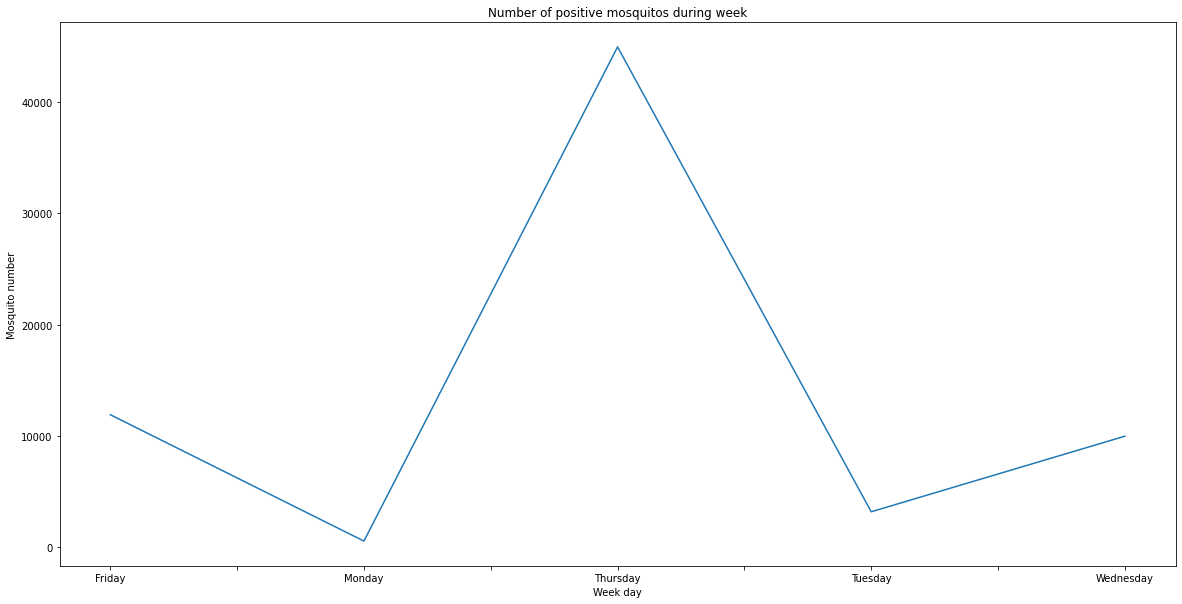

In [673]:
#group by weekday
df_positive.groupby(['Week Day'])['Mosquito number'].sum().plot()

#ylabel
plt.ylabel('Mosquito number')

#xlabel
plt.xlabel('Week day')

#title
plt.title('Number of positive mosquitos during week')

We see that on Thursdays the the positive number of mosquitos reaches to its highest during the week. we have a spread trend during week

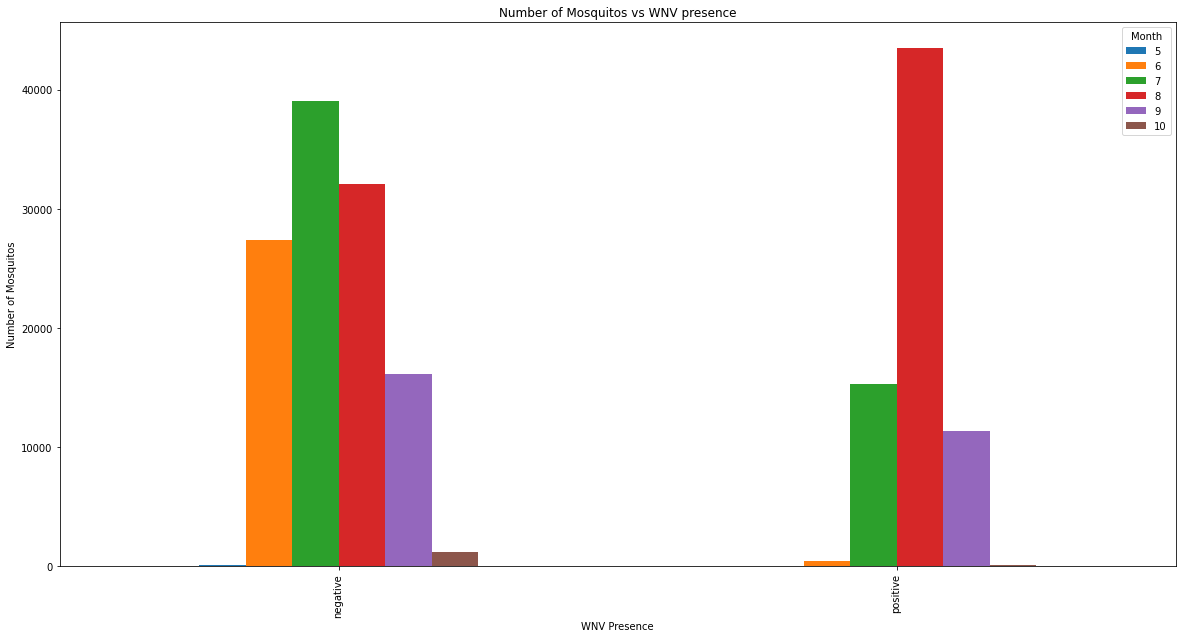

In [590]:
#groupby month and wnv present
df_WNVandMonth=df.groupby(['WNV Present','Month'])['Mosquito number'].agg(['sum'])

df_WNVandMonth.unstack().plot(kind='bar')
#title
plt.title('Number of Mosquitos vs WNV presence')

#xlabel
plt.xlabel('WNV Presence')

#ylabel
plt.ylabel('Number of Mosquitos')

#editing legend
plt.legend(["5", "6",'7','8','9','10'], title='Month')

From the figure above we can see the number of positive ones is in the highest on August

In [566]:
#draw a map to see the positive locations
import folium
my_map=folium.Map(
location=[41.8781,87.6298],
zoom_start=2)
my_map

for index, row in df_positive.iterrows():
    folium.Marker(
    location=[df_positive['Lat'][index],df_positive['Lon'][index]],
    popup=df_positive['Mosquito number']).add_to(my_map)
    
my_map